Populations follow **distributions**, which are likelihoods of values we expect to see. Not to be confused with an individual *sample*, a **sampling distribution** is the *distribution* of a particular statistic (mean, median, etc) across multiple repeated *samples* of the *same size from the same population.*

But what effect does sampling have on what you can infer that from your population?

Does the ratio of "4 out of 5 dentists" that recommend something extrapolate to *all dentists* or would it be more accurate to say "4 out of the 5 dentists that we asked"?

## Ex: Coin Flipping

There's no real "population" of coin flips-- you can perform the flip an infinite number of times, so it'd be impossible to gather all values and calculate the true population parameters. Nevertheless, we know that the distribution of a fair coin is 50/50.

But, for the sake of argument, say you only flipped one coin and recored that it landed on heads. That heads result obviously doesn't extrapolate to every other coin. Or to put it differently, we can't then infer that the "probability of getting heads is 100%," based on the result of our one coin-flip.

### Simulating a Lot of Coin Flips

Here, let's assign the value `1` to any coin that lands on heads, and `0` for tails.

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


So we have a function that will give the sample proportion of a coin that was flipped `n` times

In [2]:
def coinflip_prop(n):
    return np.random.randint(2, size=n).mean()

In [3]:
coinflip_prop(10)

0.40000000000000002

And build a way to sample that flip multiple times

In [4]:
def samples_of_coinflips(samples, nFlips):
    return np.array([coinflip_prop(nFlips) for x in range(samples)])

In [5]:
samples_of_coinflips(5, 10)

array([ 0.5,  0.6,  0.3,  0.5,  0.4])

### A Few Samples

We can take a look at what happens **to the distribution of results, when we monitor the _sample proportion_**.

For 25 samples of "fair coin flipped 10 times", we get

(0.436, 0.18736061485808589)

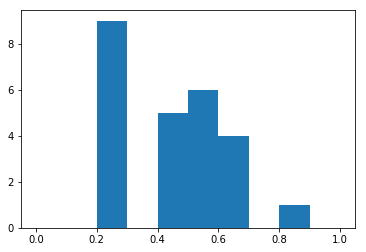

In [6]:
tenFlips = samples_of_coinflips(25, 10)
_  = plt.hist(tenFlips, range=(0, 1))
tenFlips.mean(), tenFlips.std()

And again

(0.47599999999999992, 0.110562199688682)

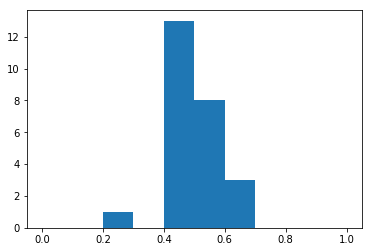

In [7]:
tenFlips = samples_of_coinflips(25, 10)
_  = plt.hist(tenFlips, range=(0, 1))
tenFlips.mean(), tenFlips.std()

### Big Sample Size

Whereas if we did 1000 flips, 25 times, we see that the average value for all flips is perfectly centered around the value we expect, .5

(0.50087999999999999, 0.013865987162838432)

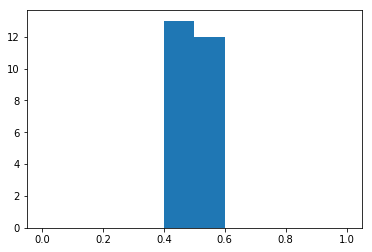

In [8]:
thousandFlips = samples_of_coinflips(25, 1000)
_  = plt.hist(thousandFlips, range=(0, 1))
thousandFlips.mean(), thousandFlips.std()

Thus, **the larger your sample size, the less variability in your sampling distribution**

### A Lot of Samples

Conversely, if we only ever look at 10 flips at a time, but repeat that sample thousands of times

(0.4997975999999999, 0.15809452563020646)

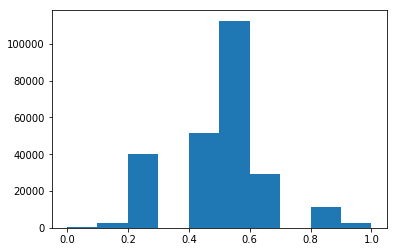

In [9]:
tenFlips = samples_of_coinflips(250000, 10)
_  = plt.hist(tenFlips, range=(0, 1))
tenFlips.mean(), tenFlips.std()

we find that the sampling distribution starts to look like a normal curve

### A Lot of Both

Indeed, when we take a ton of samples, each sampling a lot of coin flips, we can see that **the distribution of the sample mean follows a normal distribution**

(0.50011791999999988, 0.049848230609256333)

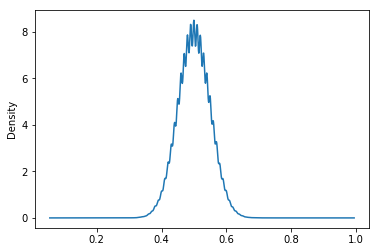

In [10]:
import pandas as pd

hundredFlips = samples_of_coinflips(250000, 100)
pd.Series(hundredFlips).plot(kind='density')
hundredFlips.mean(), hundredFlips.std()